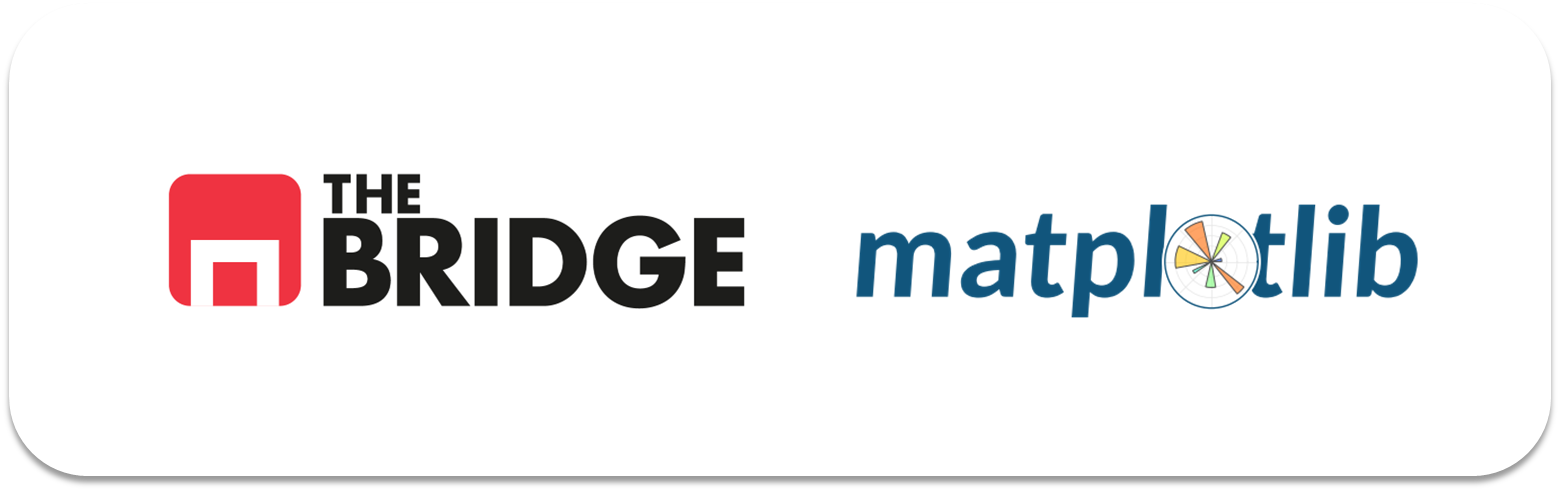

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df_california = pd.read_csv("./data/california_cities.csv")
df_california.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [3]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [4]:
# Tratamiento de nulos
nulos = df_california.isnull().sum()
porcentaje_nulos = nulos /len(df_california) * 100
porcentaje_nulos

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           9.958506
elevation_ft          2.489627
population_total      0.000000
area_total_sq_mi      0.414938
area_land_sq_mi       0.000000
area_water_sq_mi      0.207469
area_total_km2        1.037344
area_land_km2         0.829876
area_water_km2        0.829876
area_water_percent    1.037344
dtype: float64

In [5]:
# Elimino las filas que tienen nulos en las columnas de menos de 1%
df_california = df_california.dropna(subset = ["area_total_sq_mi","area_water_sq_mi","area_land_km2","area_water_km2"])
nulos = df_california.isnull().sum()
porcentaje_nulos = nulos /len(df_california) * 100
porcentaje_nulos

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           9.263158
elevation_ft          2.315789
population_total      0.000000
area_total_sq_mi      0.000000
area_land_sq_mi       0.000000
area_water_sq_mi      0.000000
area_total_km2        0.000000
area_land_km2         0.000000
area_water_km2        0.000000
area_water_percent    0.210526
dtype: float64

In [6]:
# como area_water_percent ha disminuido lo eliminamos tambien
df_california = df_california.dropna(subset = ["area_water_percent"])
nulos = df_california.isnull().sum()
porcentaje_nulos = nulos /len(df_california) * 100
porcentaje_nulos

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           9.071730
elevation_ft          2.109705
population_total      0.000000
area_total_sq_mi      0.000000
area_land_sq_mi       0.000000
area_water_sq_mi      0.000000
area_total_km2        0.000000
area_land_km2         0.000000
area_water_km2        0.000000
area_water_percent    0.000000
dtype: float64

In [7]:
# Las columnas con nulos que quedan estan relacionadas por lo que podemos hacer un calculo para sustituir los valores.
# Sin embargo, aquellas que tengan ambas columnas nulas deben se eliminadas.
filas_nulas = df_california[df_california.isnull().any(axis=1)]
filas_nulas

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
15,15,Arcata,40.866389,-124.082778,NaN,23.0,17231,10.994,9.097,1.897,28.473,23.561,4.912,17.25
26,26,Bakersfield,35.366667,-119.016667,NaN,404.0,347483,143.609,142.164,1.445,371.946,368.204,3.742,1.01
41,41,Bishop,37.363500,-118.395100,NaN,4150.0,3879,1.911,1.864,0.047,4.949,4.827,0.122,2.50
47,47,Brentwood,37.931944,-121.695833,NaN,79.0,51481,14.805,14.786,0.019,38.345,38.295,0.049,0.13
54,54,Calexico,32.678889,-115.498889,NaN,3.0,38572,8.391,8.391,0.000,21.733,21.733,0.000,0.00
57,57,Calipatria,33.125556,-115.514167,NaN,-180.0,7705,3.716,3.716,0.000,9.624,9.624,0.000,0.00
64,64,CarmelbytheSea,36.555278,-121.923333,NaN,NaN,3722,1.080,1.080,0.000,2.798,2.798,0.000,0.00
76,76,Claremont,34.110000,-117.719722,NaN,NaN,34926,13.486,13.348,0.138,34.930,34.571,0.358,1.03


In [8]:
df_california = df_california[~(df_california['elevation_m'].isnull() & df_california['elevation_ft'].isnull())]
df_california[df_california.isnull().any(axis=1)]

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
15,15,Arcata,40.866389,-124.082778,NaN,23.0,17231,10.994,9.097,1.897,28.473,23.561,4.912,17.25
26,26,Bakersfield,35.366667,-119.016667,NaN,404.0,347483,143.609,142.164,1.445,371.946,368.204,3.742,1.01
41,41,Bishop,37.363500,-118.395100,NaN,4150.0,3879,1.911,1.864,0.047,4.949,4.827,0.122,2.50
47,47,Brentwood,37.931944,-121.695833,NaN,79.0,51481,14.805,14.786,0.019,38.345,38.295,0.049,0.13
54,54,Calexico,32.678889,-115.498889,NaN,3.0,38572,8.391,8.391,0.000,21.733,21.733,0.000,0.00
57,57,Calipatria,33.125556,-115.514167,NaN,-180.0,7705,3.716,3.716,0.000,9.624,9.624,0.000,0.00
79,79,Cloverdale,38.799167,-123.017222,NaN,335.0,8618,2.648,2.648,0.000,6.857,6.857,0.000,0.00
98,98,CrescentCity,41.755833,-124.201667,NaN,43.0,7643,2.415,1.963,0.452,6.255,5.085,1.170,18.70


In [9]:
# Para pasar de pies a metro se debe multiplicar los pies por 0,3048
df_california['elevation_m'] = df_california['elevation_m'].fillna(df_california['elevation_ft'] * 0.3048)
df_california.head() # para comprobarlo me fijo en Alameda y albany que esté bien hecho

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0000,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0000,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,10.0584,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,13.1064,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0000,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [10]:
# Para pasar de metros a pies se debe dividir los metros por 0,3048
# Ademas lo redondeamos porque vemos que aparecen cifras exactas
df_california['elevation_ft'] = df_california['elevation_ft'].fillna(df_california['elevation_m'] / 0.3048).round(0)

In [11]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          468 non-null    int64  
 1   city                468 non-null    object 
 2   latd                468 non-null    float64
 3   longd               468 non-null    float64
 4   elevation_m         468 non-null    float64
 5   elevation_ft        468 non-null    float64
 6   population_total    468 non-null    int64  
 7   area_total_sq_mi    468 non-null    float64
 8   area_land_sq_mi     468 non-null    float64
 9   area_water_sq_mi    468 non-null    float64
 10  area_total_km2      468 non-null    float64
 11  area_land_km2       468 non-null    float64
 12  area_water_km2      468 non-null    float64
 13  area_water_percent  468 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 54.8+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

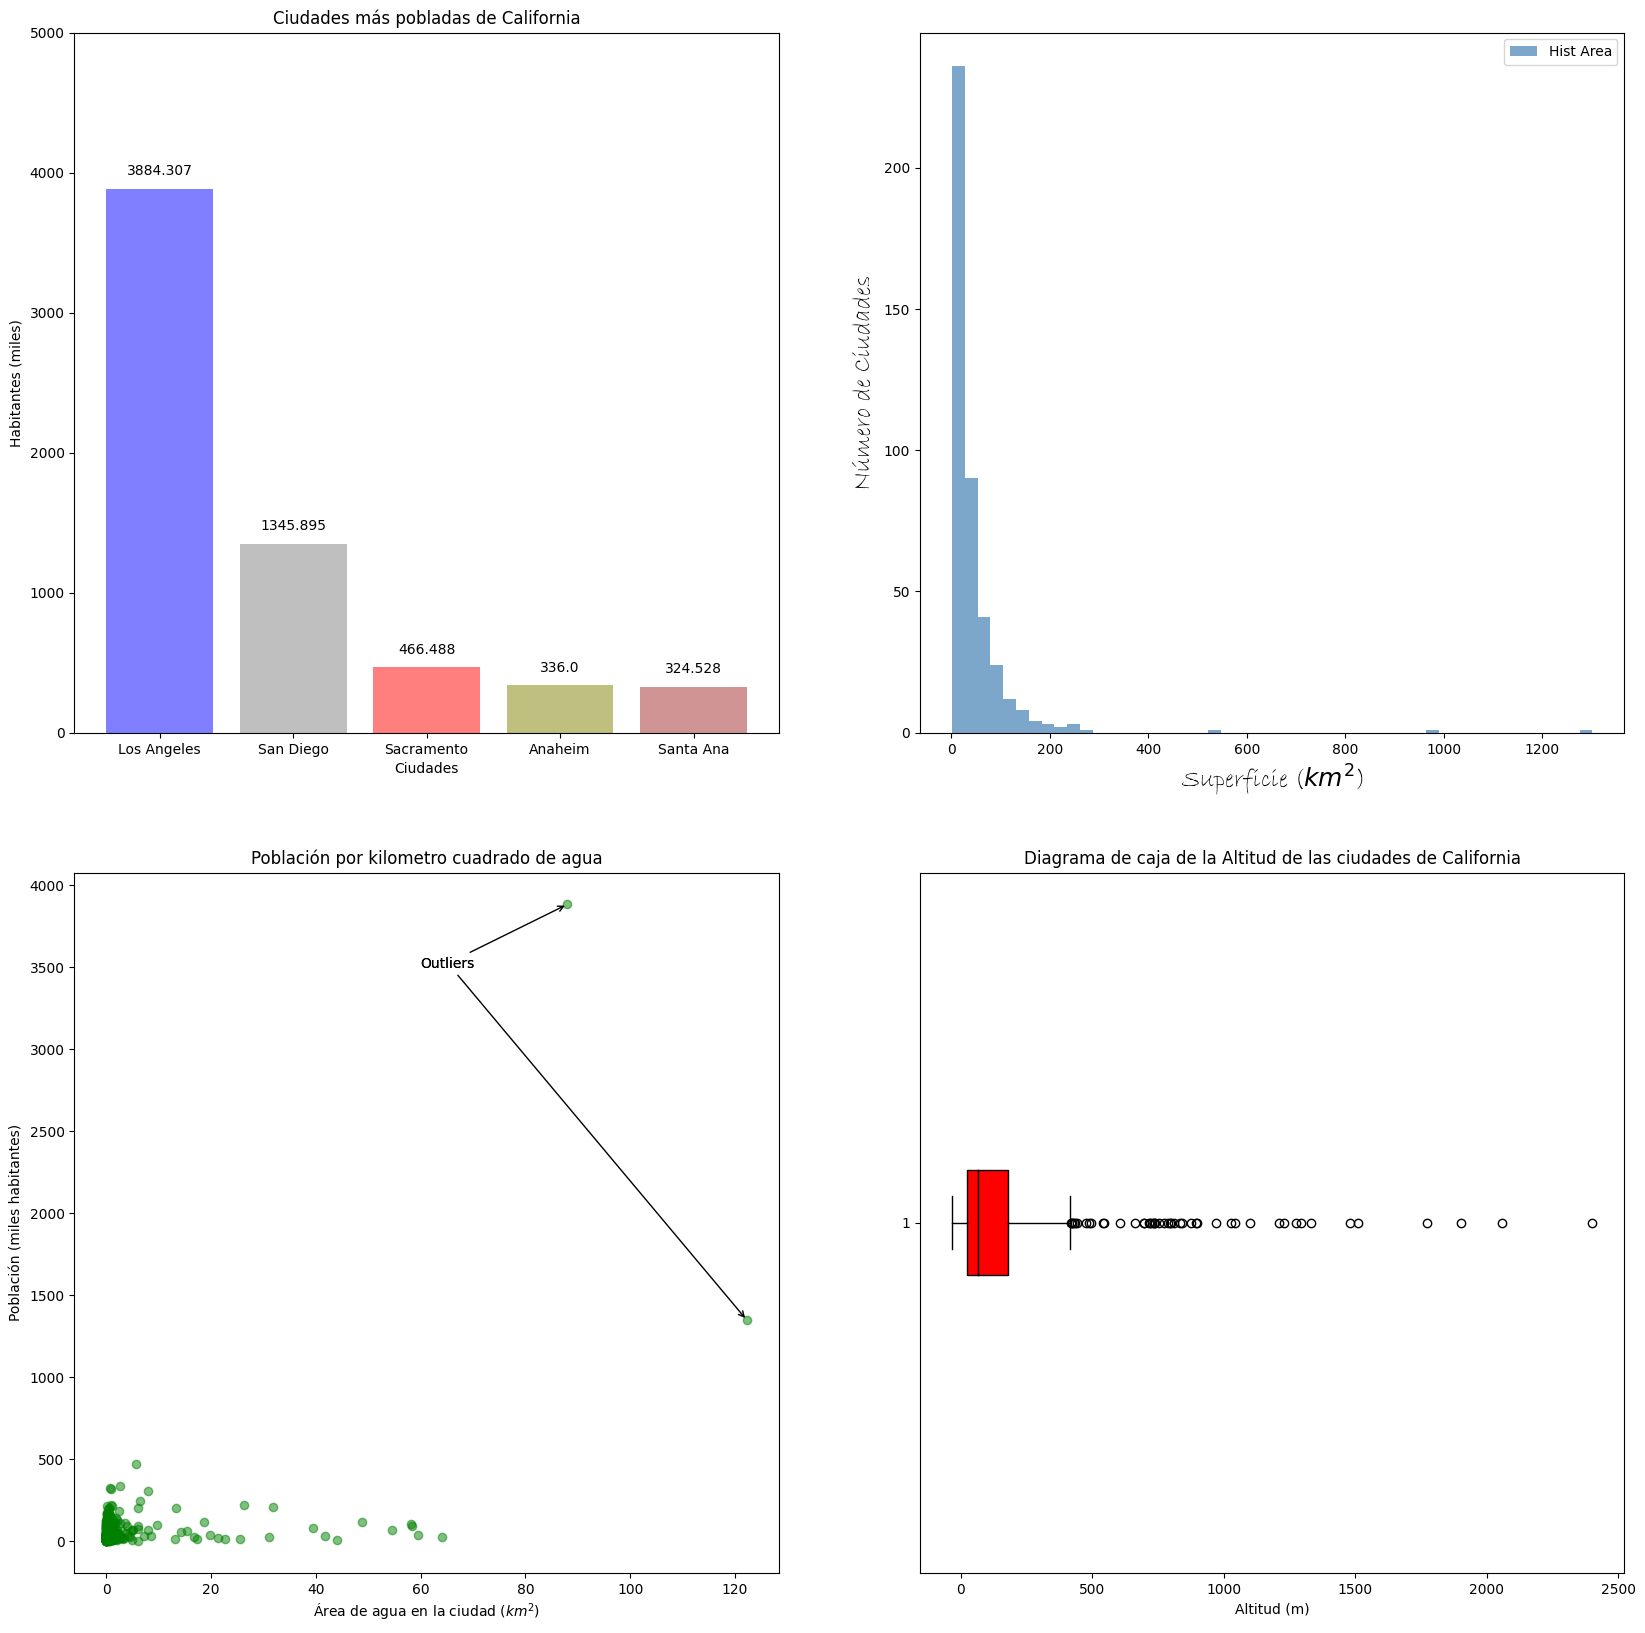

### 1.2.1

In [12]:
# Seleccionamos las 5 ciudades de myor poblacion
top_5 = df_california.nlargest(5, 'population_total')
top_5

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.050000,-118.250000,71.0000,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
367,367,SanDiego,32.715000,-117.162500,6.0000,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
375,375,SanJose,37.333333,-121.900000,26.0000,85.0,1000536,179.970,176.526,3.439,466.109,457.201,8.908,1.91
150,150,Fresno,36.750000,-119.766667,93.8784,308.0,509039,112.308,111.957,0.351,290.877,289.967,0.910,0.31
359,359,Sacramento,38.555556,-121.468889,9.0000,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19


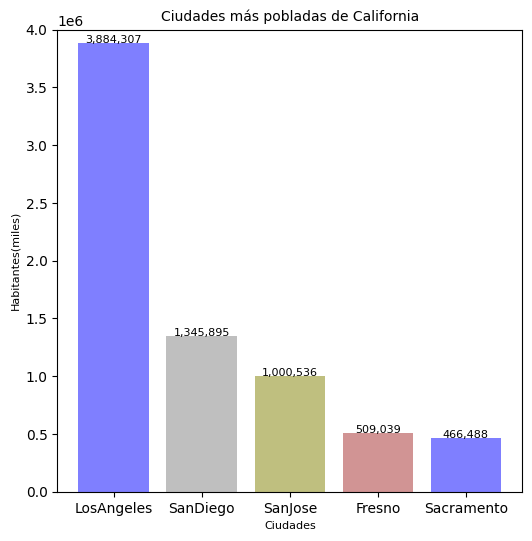

In [13]:
# Lista de colores
colores = ['blue', 'grey', 'olive', 'brown']

# Creamos el gráfico
plt.figure(figsize=(6, 6))
plt.bar(top_5['city'], top_5['population_total'], color=colores, alpha = 0.5)

# Agregar títulos y etiquetas
plt.title('Ciudades más pobladas de California', fontsize=10)
plt.xlabel('Ciudades', fontsize=8)
plt.ylabel('Habitantes(miles)', fontsize=8)

#Poner los valores de cada barra con un bucle
for index, value in enumerate(top_5['population_total']):
    plt.text(index, value, f"{value:,}", ha='center', fontsize=8);

plt.yscale('linear')
plt.ylim(0, 4000000)  # Limita el eje y entre 0 y 4000000
plt.yticks(range(0, 4500000, 500000));  # Define etiquetas en pasos de 500000


### 1.2.2

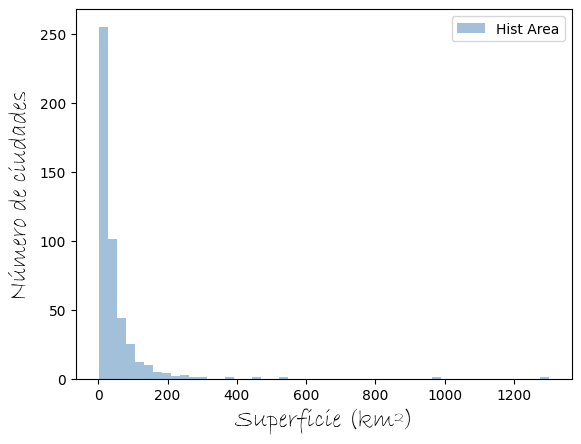

In [14]:
superficie = df_california['area_total_km2']	
plt.hist(superficie,
         bins = 50, #numero de barras
         alpha = 0.5,
         color ="steelblue"
        );

dict_ejes = {'family': 'Bradley Hand itc',
             'size': 18} 
# Agregar el nombre del eje X
plt.xlabel('Superficie (km²)', fontdict = dict_ejes)
# Agregar el nombre del eje Y
plt.ylabel('Número de ciudades', fontdict = dict_ejes)
#Agregar la leyenda
plt.legend(['Hist Area'], loc='upper right')


### 1.2.3

Text(55, 3000000, 'Outliers')

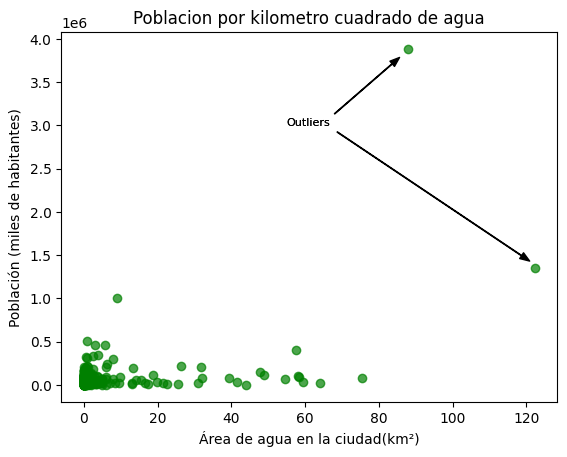

In [15]:
plt.scatter(df_california['area_water_km2'], df_california['population_total'], color = 'green', alpha = 0.7)
plt.xlabel("Área de agua en la ciudad(km²)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Poblacion por kilometro cuadrado de agua");


origen_x=55
origen_y=3000000

#Buscamos los valores atipicos para señalarlos en el gráfico:
plt.annotate('Outliers',
             xy=(86, 3800000),
             xytext=(origen_x,origen_y),
             arrowprops=dict(facecolor='black', shrink=0.02,width=0.3, headwidth=5, headlength=7),
             fontsize=8, color='black')

plt.annotate('Outliers',
             xy=(122, 1400000),
             xytext=(origen_x,origen_y),
             arrowprops=dict(facecolor='black', shrink=0.02,width=0.3, headwidth=5, headlength=7),
             fontsize=8, color='black')

### 1.2.4

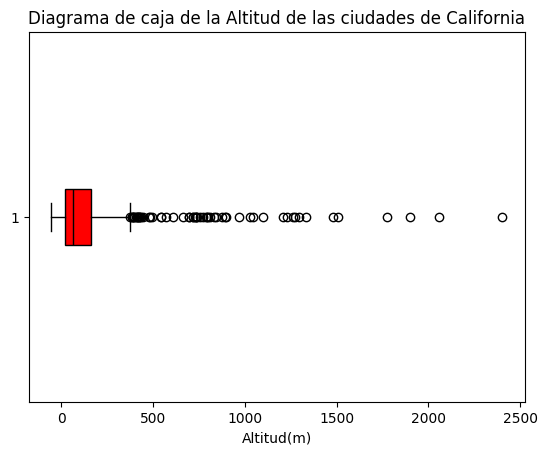

In [16]:
altitud = df_california['elevation_m']
box = plt.boxplot(altitud, vert = False, boxprops=dict(color='black'), medianprops=dict(color='black'),patch_artist=True)
for patch in box['boxes']:
    patch.set(facecolor='red')  # Color de relleno de las caja
    
plt.title ("Diagrama de caja de la Altitud de las ciudades de California")
plt.xlabel("Altitud(m)");

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

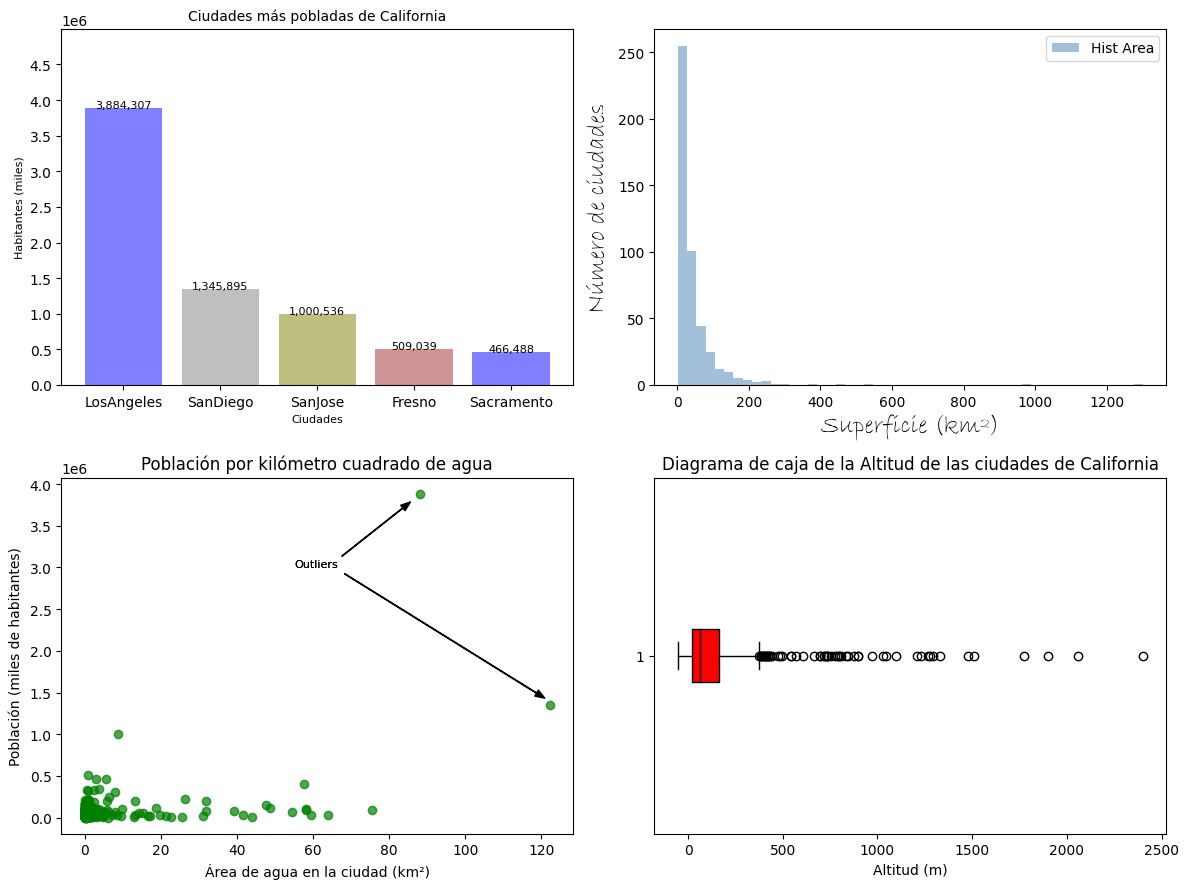

In [18]:
# Creamos la figura de 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

#---------------------------------------------------------------------------------------------------------------------------------------

# Gráfico de barras en la posición [0, 0]
axs[0, 0].bar(top_5['city'], top_5['population_total'], color=colores, alpha=0.5)

# Lista de colores
colores = ['blue', 'grey', 'olive', 'brown']

# Agregar títulos y etiquetas
axs[0, 0].set_title('Ciudades más pobladas de California', fontsize=10)
axs[0, 0].set_xlabel('Ciudades', fontsize=8)
axs[0, 0].set_ylabel('Habitantes (miles)', fontsize=8)

# Poner los valores de cada barra con un bucle
for index, value in enumerate(top_5['population_total']):
    axs[0, 0].text(index, value, f"{value:,}", ha='center', fontsize=8)

# Configurar el eje Y
axs[0, 0].set_ylim(0, 5000000)  # Limita el eje y entre 0 y 4000000
axs[0, 0].set_yticks(range(0, 5000000, 500000))  # Define etiquetas en pasos de 500000

#---------------------------------------------------------------------------------------------------------------------------------------

# Histograma en la posición [0, 1]
superficie = df_california['area_total_km2']    
axs[0, 1].hist(superficie, bins=50, alpha=0.5, color="steelblue")

# Personalizar los ejes y agregar etiquetas
dict_ejes = {'family': 'Bradley Hand itc', 'size': 18}
axs[0, 1].set_xlabel('Superficie (km²)', fontdict=dict_ejes)
axs[0, 1].set_ylabel('Número de ciudades', fontdict=dict_ejes)

# Agregar leyenda
axs[0, 1].legend(['Hist Area'], loc='upper right')

#---------------------------------------------------------------------------------------------------------------------------------------

# Gráfico de dispersión en [1, 0]
axs[1, 0].scatter(df_california['area_water_km2'], df_california['population_total'], color='green', alpha=0.7)
axs[1, 0].set_xlabel("Área de agua en la ciudad (km²)")
axs[1, 0].set_ylabel("Población (miles de habitantes)")
axs[1, 0].set_title("Población por kilómetro cuadrado de agua")

# Agregar anotaciones de outliers
origen_x = 55
origen_y = 3000000
axs[1, 0].annotate('Outliers',
                   xy=(86, 3800000),
                   xytext=(origen_x, origen_y),
                   arrowprops=dict(facecolor='black', shrink=0.02, width=0.3, headwidth=5, headlength=7),
                   fontsize=8, color='black')
axs[1, 0].annotate('Outliers',
                   xy=(122, 1400000),
                   xytext=(origen_x, origen_y),
                   arrowprops=dict(facecolor='black', shrink=0.02, width=0.3, headwidth=5, headlength=7),
                   fontsize=8, color='black')


#---------------------------------------------------------------------------------------------------------------------------------------

# Boxplot en la posiion [1,1]
altitud = df_california['elevation_m']
box = axs[1, 1].boxplot(
    altitud,
    vert=False,
    boxprops=dict(color='black'),
    medianprops=dict(color='black'),
    patch_artist=True
)

# Cambiar el color de relleno
for patch in box['boxes']:
    patch.set(facecolor='red')  # Relleno rojo para la caja

# Personalizar el título y etiquetas del subplot
axs[1, 1].set_title("Diagrama de caja de la Altitud de las ciudades de California")
axs[1, 1].set_xlabel("Altitud (m)")

#---------------------------------------------------------------------------------------------------------------------------------------

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

#---------------------------------------------------------------------------------------------------------------------------------------

# Guardar la figura en un archivo (por ejemplo, PNG o PDF)
plt.savefig("mi_figura.png", dpi=300, bbox_inches='tight')